# Trials

This notebook provides a tutorial on how to use the `Trials` classes in Elephant for handling neuroscience data structured in repeated trials. The `Trials` classes provide a unified API to access and manipulate trial data, regardless of whether the data is stored in `neo.Block` or as lists of lists.

## Introduction

In neuroscience, trials are repeated experimental runs that help in estimating various quantities from the data. The Trials class in Elephant provides a structured way to handle and access trial data, irrespective of how it is stored. This overview will cover the basic structure and functionalities of the Trials class and its subclasses.

## Imports and Setup

First, we need to import the necessary modules and set up some example data.

In [1]:
import numpy as np
import neo
from neo.core import Block, Segment, SpikeTrain, AnalogSignal
from quantities import ms, mV, Hz
from elephant.trials import TrialsFromBlock, TrialsFromLists
from elephant.datasets import download_datasets
import matplotlib.pyplot as plt


# Helper function to create example spike trains and analog signals
def create_example_data():
    spike_times = [np.array([10, 20, 30]) * ms, np.array([15, 25, 35]) * ms]
    spike_trains = [SpikeTrain(spike_time, t_start=0*ms, t_stop=40*ms) for spike_time in spike_times]
    analog_signals = [AnalogSignal(np.random.randn(1000), sampling_rate=1000 * Hz, units=mV) for _ in range(2)]
    return spike_trains, analog_signals


# Download example data

In [2]:
# Download data
repo_path='tutorials/tutorial_unitary_event_analysis/data/dataset-1.nix'
filepath=download_datasets(repo_path)

# Load data
io = neo.io.NixIO(f"{filepath}",'ro')
block = io.read_block()

/home/kern/git/inm-6/elephant/elephant/datasets.py:154: UserWarning: No corresponding version of elephant-data found.
Elephant version: 1.2.0b1. Data URL:https://gin.g-node.org/NeuralEnsemble/elephant-data/raw/v1.2.0b1/README.md, error: HTTP Error 404: Not Found.
Using elephant-data latest instead (This is expected for elephant development versions).
  warnings.warn(f"No corresponding version of elephant-data found.\n"


## Example 1: Using `TrialsFromBlock`

In this example, we create a `neo.Block` containing multiple `neo.Segment` objects, each representing a trial. We then use the `TrialsFromBlock` class to access and manipulate the trial data,
this subclass handles trial data stored in a `neo.Block`, where each `neo.Segment` within the block represents a trial.

In [3]:
# Create a TrialsFromBlock instance
trials_from_block = TrialsFromBlock(block)

# Access trial data
print(f'Number of trials: {trials_from_block.n_trials}')
print(f'Number of spike trains in each trial: {trials_from_block.n_spiketrains_trial_by_trial}')
print(f'Number of analog signals in each trial: {trials_from_block.n_analogsignals_trial_by_trial}')

# Get a specific trial as a Segment
trial_1_segment = trials_from_block.get_trial_as_segment(1)
print(f'Trial 1 Segment: {trial_1_segment}')

# Get all spike trains from trial
all_spike_trains_trial_2 = trials_from_block.get_spiketrains_from_trial_as_list(trial_id=1)
print(f'All spike trains from trial 2: {all_spike_trains_trial_2}')

Number of trials: 36
Number of spike trains in each trial: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Number of analog signals in each trial: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Trial 1 Segment: <neo.core.segment.Segment object at 0x7b25536ad040>
All spike trains from trial 2: [<SpikeTrain(array([   4.,   45.,   85.,  123.,  156.,  185.,  226.,  274.,  296.,
        323.,  348.,  371.,  404.,  471.,  499.,  530.,  560.,  581.,
        601.,  626.,  654.,  700.,  727.,  762.,  792.,  805.,  827.,
        828.,  847.,  869.,  899.,  920.,  933.,  972., 1001., 1023.,
       1031., 1051., 1086., 1152., 1172., 1176., 1199., 1223., 1245.,
       1273., 1304., 1379., 1400., 1401., 1417., 1424., 1444., 1449.,
       1483., 1546., 1564., 1583., 1588., 1615., 1629., 1660., 1683.,
       1706., 1732., 1774., 1816., 1834., 1849., 1884., 1905., 2030.]) * ms, [0.

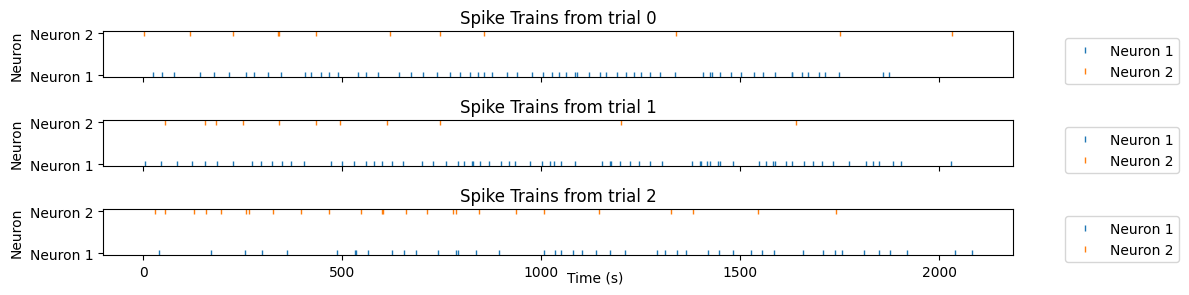

In [6]:
# Plot all spiketrains belonging to specific trials
trials = (3,4,5)
n_trials = len(trials)

# Create a figure with subplots for each trial
fig, axes = plt.subplots(n_trials, 1, figsize=(12, 1 * n_trials), sharex=True)

for trial_no, _ in enumerate(trials):
    spiketrains = trials_from_block.get_spiketrains_from_trial_as_list(trial_no)

    for i, spiketrain in enumerate(spiketrains):
        axes[trial_no].plot(spiketrain.times, [i] * len(spiketrain), '|', markersize=5, label=f'Neuron {i+1}')
    
    # Set labels and title for each subplot
    axes[trial_no].set_ylabel('Neuron')
    axes[trial_no].set_title(f'Spike Trains from trial {trial_no}')
    
    # Set y-axis ticks to match neuron numbers
    axes[trial_no].set_yticks(range(len(spiketrains)))
    axes[trial_no].set_yticklabels([f'Neuron {i+1}' for i in range(len(spiketrains))])
    
    # Add legend to each subplot
    axes[trial_no].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Set common x-label
fig.text(0.5, 0.04, 'Time (s)', ha='center')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Example 2: Using `TrialsFromLists`

The `TrialsFromLists` handles trial data stored as lists of lists, where each inner list contains neo.SpikeTrain and neo.AnalogSignal objects representing a trial. In this example, we create a list of lists, where each inner list contains `neo.SpikeTrain` and `neo.AnalogSignal` objects representing a trial. We then use the `TrialsFromLists` class to access and manipulate the trial data. 

In [ ]:
# Create example data
spike_times, analog_signals = create_example_data()

# Create a list of lists representing trials
list_of_trials = []
for i in range(3):
    trial = []
    for spike_time in spike_times:
        trial.append(SpikeTrain(spike_time, t_start=0*ms, t_stop=40*ms))
    for analog_signal in analog_signals:
        trial.append(analog_signal)
    list_of_trials.append(trial)

# Create a TrialsFromLists instance
trials_from_lists = TrialsFromLists(list_of_trials)

# Access trial data
print(f'Number of trials: {trials_from_lists.n_trials}')
print(f'Number of spike trains in each trial: {trials_from_lists.n_spiketrains_trial_by_trial}')
print(f'Number of analog signals in each trial: {trials_from_lists.n_analogsignals_trial_by_trial}')

# Get a specific trial as a Segment
trial_1_segment = trials_from_lists.get_trial_as_segment(1)
print(f'Trial 1 Segment: {trial_1_segment}')

# Get all trials as a Block
all_spike_trains_trial_2 = trials_from_lists.get_trials_as_block()
print(f'All trials Block: {all_spike_trains_trial_2}')

# Using TrialsFromLists
trials_as_list = trials_from_lists.get_trials_as_list()
print(f'Number of segments in trials_list_from_lists: {len(trials_as_list)}')
for i, segment in enumerate(trials_as_list):
    print(f'Trial {i} Segment: {segment}')
    for i, spike_train in enumerate(segment.spiketrains):
        print(f'    Spike train {i} Spike train: {spike_train}')
    for i, analog_signal in enumerate(segment.analogsignals):
        print(f'    Analog signal {i} Analog signal: {analog_signal[:4].flatten()}')

Number of trials: 3
Number of spike trains in each trial: [2, 2, 2]
Number of analog signals in each trial: [2, 2, 2]
Trial 1 Segment: <neo.core.segment.Segment object at 0x7f20b8c661b0>
All trials Block: <neo.core.block.Block object at 0x7f210c1b54f0>
Number of segments in trials_list_from_lists: 3
Trial 0 Segment: <neo.core.segment.Segment object at 0x7f20b9409700>
    Spike train 0 Spike train: [10. 20. 30.] ms
    Spike train 1 Spike train: [15. 25. 35.] ms
    Analog signal 0 Analog signal: [-0.35546363  1.69106607 -1.3224601   0.13145046] mV
    Analog signal 1 Analog signal: [ 0.58983451 -1.21403348 -0.2027809   0.27795667] mV
Trial 1 Segment: <neo.core.segment.Segment object at 0x7f210c1cffb0>
    Spike train 0 Spike train: [10. 20. 30.] ms
    Spike train 1 Spike train: [15. 25. 35.] ms
    Analog signal 0 Analog signal: [-0.35546363  1.69106607 -1.3224601   0.13145046] mV
    Analog signal 1 Analog signal: [ 0.58983451 -1.21403348 -0.2027809   0.27795667] mV
Trial 2 Segment: 